# Week 8 : se Expression #2 & Advanced Topics #1 - Closure and Decorator 

**Goal 1** : Week 7에서 배웠던 정규표현식을 제대로 활용해보자.

**Goal 2** : Advaced topics인 closure과 decorator를 배워보자.

🎉 Congratulations! 🎉

드디어 advanced topics에 도달했다.

Week 9에서 또 다른 advanced topics를 다루고 나면, 이제는 정말 'Python을 Python답게' 쓰는 법을 배울 수 있다.

지금까지 배운 것은 사실 대부분의 언어가 공통적으로 할 수 있는 것을, Python의 방식으로 표현한 정도이기 때문이다.
<br><br>
그러나 Week 10부터는, Python의 진가인 data analysis가 나온다. 혹은, data structure를 배울 수도 있다. 혹은, web site 만들기를 배울 수도 있다. 이것은 학생의 선호에 따라 달렸다. 

## re #2

### Meta Characters

아직 살펴보지 않은 메타 문자에 대해서 모두 살펴보자. 여기에서 다룰 메타 문자는 앞에서 살펴본 메타 문자와 성격이 조금 다르다. 앞에서 살펴본 +, *, [], {} 등의 메타문자는 매치가 진행될 때 현재 매치되고 있는 문자열의 위치가 변경된다(보통 소비된다고 표현한다). 하지만 이와 달리 문자열을 소비시키지 않는 메타 문자도 있다. 이번에는 이런 문자열 소비가 없는(zerowidth assertions) 메타 문자에 대해 살펴보자.

**|**

| 메타 문자는 or과 동일한 의미로 사용된다. A|B라는 정규식이 있다면 A 또는 B라는 의미가 된다.

In [ ]:
import re

p = re.compile('Crow|Servo')
m = p.match('CrowHello')

print(m)

**^**

^ 메타 문자는 문자열의 맨 처음과 일치함을 의미한다. 앞에서 살펴본 컴파일 옵션 re.MULTILINE을 사용할 경우에는 여러 줄의 문자열일 때 각 줄의 처음과 일치하게 된다.

다음 예를 보자.

※ search 함수가 잘 기억이 안난다면, Week 7 template을 같이 켜놓도록 하자.

In [ ]:
print(re.search('^Life', 'Life is too short'))

#print(re.search('^Life', 'My Life'))

^Life 정규식은 Life 문자열이 처음에 온 경우에는 매치하지만 처음 위치가 아닌 경우에는 매치되지 않음을 알 수 있다.

**$**

```$``` 메타 문자는 ```^``` 메타 문자와 반대의 경우이다. 즉 $는 문자열의 끝과 매치함을 의미한다.

다음 예를 보자.

In [ ]:
print(re.search('short$', 'Life is too short'))

#print(re.search('short$', 'Life is too short, you need python'))

short$ 정규식은 검색할 문자열이 short로 끝난 경우에는 매치되지만, 그 이외의 경우에는 매치되지 않음을 알 수 있다.

^ 또는 $ 문자를 메타 문자가 아닌 문자 그 자체로 매치하고 싶은 경우에는 ```\^```, ```\$``` 로 사용하면 된다.

**\A**

\A는 문자열의 처음과 매치됨을 의미한다. ^ 메타 문자와 동일한 의미이지만 re.MULTILINE 옵션을 사용할 경우에는 다르게 해석된다.

**re.MULTILINE 옵션**을 사용할 경우, ^은 각 줄의 문자열의 처음과 매치되지만 **\A는 줄과 상관없이 전체 문자열의 처음하고만 매치**된다.

**\Z**

\Z는 문자열의 끝과 매치됨을 의미한다. 이것 역시 \A와 동일하게 re.MULTILINE 옵션을 사용할 경우 $ 메타 문자와는 달리 **전체 문자열의 끝**과 매치된다.

**\b**

\b는 단어 구분자(Word boundary)이다. 보통 단어는 whitespace에 의해 구분된다.

다음 예를 보자.

In [ ]:
p = re.compile(r'\bclass\b')
print(p.search('no class at all'))  

\bclass\b 정규식은 앞뒤가 whitespace로 구분된 class라는 단어와 매치됨을 의미한다. 따라서 no class at all의 class라는 단어와 매치됨을 확인할 수 있다.

In [ ]:
print(p.search('the declassified algorithm'))

위 예의 the declassified algorithm 문자열 안에도 class 문자열이 포함되어 있긴 하지만 whitespace로 구분된 단어가 아니므로 매치되지 않는다.

In [ ]:
print(p.search('one subclass is'))

subclass 문자열 역시 class 앞에 sub 문자열이 더해져 있으므로 매치되지 않음을 알 수 있다.

\b 메타 문자를 사용할 때 주의해야 할 점이 있다.

<br><br>
\b는 Python literal rules에 의하면 백스페이스(BackSpace)를 의미하므로 백스페이스가 아닌 단어 구분자임을 알려 주기 위해 r'\bclass\b'처럼 **Raw string임을 알려주는 기호 r을 반드시 붙여 주어야 한다.**

**\B**

\B 메타 문자는 \b 메타 문자와 반대의 경우이다. 즉 whitespace로 구분된 단어가 아닌 경우에만 매치된다.

In [ ]:
p = re.compile(r'\Bclass\B')
print(p.search('no class at all'))  

#print(p.search('the declassified algorithm'))

#print(p.search('one subclass is'))

class 단어의 앞뒤에 whitespace가 하나라도 있는 경우에는 매치가 안 되는 것을 확인할 수 있다.

### Grouping

ABC 문자열이 계속해서 반복되는지 조사하는 정규식을 작성하고 싶다고 하자. 어떻게 해야할까? 지금까지 공부한 내용으로는 위 정규식을 작성할 수 없다. 이럴 때 필요한 것이 바로 그루핑(Grouping) 이다.

위 경우는 다음처럼 그루핑을 사용하여 작성할 수 있다.

In [ ]:
(ABC)+

그룹을 만들어 주는 메타 문자는 바로 ( )이다.

In [ ]:
p = re.compile('(ABC)+')
m = p.search('ABCABCABC OK?')

print(m)

#print(m.group())

다음 예를 보자.

In [ ]:
p = re.compile(r"\w+\s+\d+[-]\d+[-]\d+")
m = p.search("park 010-1234-1234")

\w+\s+\d+[-]\d+[-]\d+은 ```이름 + " " + 전화번호``` 형태의 문자열을 찾는 정규식이다. 그런데 이렇게 매치된 문자열 중에서 이름만 뽑아내고 싶다면 어떻게 해야 할까?
<br><br>
보통 반복되는 문자열을 찾을 때 그룹을 사용하는데, 그룹을 사용하는 보다 큰 이유는 위에서 볼 수 있듯이 매치된 문자열 중에서 특정 부분의 문자열만 뽑아내기 위해서인 경우가 더 많다.

위 예에서 만약 "이름" 부분만 뽑아내려 한다면 다음과 같이 할 수 있다.

In [ ]:
p = re.compile(r"(\w+)\s+\d+[-]\d+[-]\d+")
m = p.search("park 010-1234-1234")

print(m.group(1))

이름에 해당하는 \w+ 부분을 그룹 (\w+)으로 만들면 match 객체의 group(인덱스) 메서드를 사용하여 그루핑된 부분의 문자열만 뽑아낼 수 있다. group 메서드의 인덱스는 다음과 같은 의미를 갖는다.

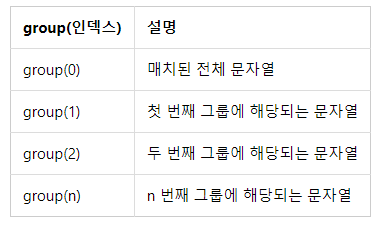

In [ ]:
p = re.compile(r"(\w+)\s+(\d+[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")

print(m.group(2))

이번에는 전화번호 부분을 추가로 그룹 (\d+[-]\d+[-]\d+)로 만들었다. 이렇게 하면 group(2)처럼 사용하여 전화번호만 뽑아낼 수 있다.

만약 전화번호 중에서 국번만 뽑아내고 싶으면 어떻게 해야 할까? 다음과 같이 국번 부분을 또 그루핑하면 된다.

In [ ]:
p = re.compile(r"(\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")

print(m.group(3))

위 예에서 볼 수 있듯이 (\w+)\s+((\d+)[-]\d+[-]\d+)처럼 그룹을 중첩되게 사용하는 것도 가능하다. 그룹이 중첩되어 있는 경우는 **바깥쪽부터 시작하여 안쪽으로 들어갈수록 인덱스가 증가**한다.

### Try It!

```전화번호 + ' ' + 이름``` 형태의 string을 찾는 re를 작성해보자.

In [ ]:
import re

p = re.compile(r"(\d+)[-]\d+[-]\d+\s+\w+")
m = p.search("010-1234-1234 park")

print(m)

010


### Backreferences

그룹의 또 하나 좋은 점은 한 번 그루핑한 문자열을 재참조(Backreferences)할 수 있다는 점이다. 다음 예를 보자.

In [ ]:
p = re.compile(r'(\b\w+)\s+\1')
p.search('Paris in the the spring').group()

정규식 (\b\w+)\s+\1은 ```(그룹) + " " + 그룹```과 동일한 단어와 매치됨을 의미한다. 이렇게 정규식을 만들게 되면, 2개의 동일한 단어를 연속적으로 사용해야만 매치된다. 이것을 가능하게 해주는 것이 바로 재참조 메타 문자인 **\1**이다. \1은 정규식의 그룹 중 첫 번째 그룹을 가리킨다.

두 번째 그룹을 참조하려면 **\2**를 사용하면 된다.

### 그루핑된 문자열에 이름 붙이기

정규식 안에 그룹이 무척 많아진다고 가정해 보자. 예를 들어 정규식 안에 그룹이 10개 이상만 되어도 매우 혼란스러울 것이다. 거기에 더해 정규식이 수정되면서 그룹이 추가, 삭제되면 그 그룹을 인덱스로 참조한 프로그램도 모두 변경해 주어야 하는 위험도 갖게 된다.
<br><br>
만약 그룹을 인덱스가 아닌 이름(Named Groups)으로 참조할 수 있다면 어떨까? 그렇다면 이런 문제에서 해방되지 않을까?

이러한 이유로 정규식은 그룹을 만들 때 그룹 이름을 지정할 수 있게 했다. 그 방법은 다음과 같다.

In [ ]:
(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)

위 정규식은 앞에서 본 이름과 전화번호를 추출하는 정규식이다. 기존과 달라진 부분은 다음과 같다.

```(\w+) --> (?P<name>\w+)```

대단히 복잡해진 것처럼 보이지만 (\w+)라는 그룹에 name이라는 이름을 붙인 것에 불과하다. 여기에서 사용한 (?...) 표현식은 정규 표현식의 **확장 구문**이다.

이 확장 구문을 사용하기 시작하면 가독성이 상당히 떨어지긴 하지만, 반면에 강력함을 갖게 된다.

그룹에 이름을 지어 주려면 다음과 같은 확장 구문을 사용해야 한다.

In [ ]:
(?P<그룹명>...)

그룹에 이름을 지정하고 참조하는 다음 예를 보자.

In [ ]:
p = re.compile(r"(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")

print(m.group("name"))

위 예에서 볼 수 있듯이 name이라는 그룹 이름으로 참조할 수 있다.

그룹 이름을 사용하면 정규식 안에서 재참조하는 것도 가능하다.

In [ ]:
p = re.compile(r'(?P<word>\b\w+)\s+(?P=word)')
p.search('Paris in the the spring').group()

위 예에서 볼 수 있듯이 재참조할 때에는 **(?P=그룹이름)이라는 확장 구문**을 사용해야 한다.

### Advanced - Lookahead Assertions (전방 탐색)

In [ ]:
p = re.compile(".+:")
m = p.search("http://google.com")

print(m.group())

정규식 .+:과 일치하는 문자열로 http:를 돌려주었다.

만약 http:라는 검색 결과에서 :을 제외하고 출력하려면 어떻게 해야 할까? 위 예는 그나마 간단하지만 훨씬 복잡한 정규식이어서 그루핑은 추가로 할 수 없다는 조건까지 더해진다면 어떻게 해야 할까?<br><br>

이럴 때 사용할 수 있는 것이 바로 **전방 탐색**이다. 전방 탐색에는 **긍정(Positive)**과 **부정(Negative)**의 2종류가 있고 다음과 같이 표현한다.

- 긍정형 전방 탐색((?=...)) - ... 에 해당되는 정규식과 매치되어야 하며 조건이 통과되어도 문자열이 소비되지 않는다.
- 부정형 전방 탐색((?!...)) - ...에 해당되는 정규식과 매치되지 않아야 하며 조건이 통과되어도 문자열이 소비되지 않는다.

**1. 긍정형 전방 탐색**

긍정형 전방 탐색을 사용하면 http:의 결과를 http로 바꿀 수 있다. 다음 예를 보자.

In [ ]:
p = re.compile(".+(?=:)")

m = p.search("http://google.com")
print(m.group())

정규식 중 :에 해당하는 부분에 **긍정형 전방 탐색 기법**을 적용하여, (?=:)으로 변경하였다. 

이렇게 되면 기존 정규식과 검색에서는 동일한 효과를 발휘하지만, : 에 해당하는 문자열이 정규식 엔진에 의해 소비되지 않아(검색에는 포함되지만 검색 결과에는 제외됨) 검색 결과에서는 :이 제거된 후 돌려주는 효과가 있다.

**2. 부정형 전방 탐색**

In [ ]:
.*[.].*$

이 정규식은 ```파일 이름 + . + 확장자```를 나타내는 정규식이다. 이 정규식은 foo.bar, autoexec.bat, sendmail.cf 같은 형식의 파일과 매치될 것이다.

이 정규식에 확장자가 "bat인 파일은 제외해야 한다"는 조건을 추가해 보자. 가장 먼저 생각할 수 있는 정규식은 다음과 같다.

In [ ]:
.*[.][^b].*$

이 정규식은 확장자가 b라는 문자로 시작하면 안 된다는 의미이다. 하지만 이 정규식은 foo.bar라는 파일마저 걸러 낸다. 정규식을 다음과 같이 수정해 보자.

In [ ]:
.*[.]([^b]..|.[^a].|..[^t])$

이 정규식은 | 메타 문자를 사용하여 확장자의 첫 번째 문자가 b가 아니거나 두 번째 문자가 a가 아니거나 세 번째 문자가 t가 아닌 경우를 의미한다.
<br><br>
이 정규식에 의하여 foo.bar는 제외되지 않고 autoexec.bat은 제외되어 만족스러운 결과를 돌려준다. 하지만 이 정규식은 아쉽게도 sendmail.cf처럼, 확장자의 문자 개수가 2개인 케이스를 포함하지 못하는 오동작을 하기 시작한다.

따라서 다음과 같이 바꾸어야 한다.

In [ ]:
.*[.]([^b].?.?|.[^a]?.?|..?[^t]?)$

**확장자의 문자 개수가 2개여도 통과되는 정규식**이 만들어졌다. 하지만 정규식은 점점 더 복잡해지고 이해하기 어려워진다.

그런데 여기에서 bat 파일말고 exe 파일도 제외하라는 조건이 추가로 생긴다면 어떻게 될까? 이 모든 조건을 만족하는 정규식을 구현하려면 패턴은 더욱더 복잡해질 것이다.<br><br>

이러한 상황의 구원 투수는 바로 부정형 전방 탐색이다. 위 예는 **부정형 전방 탐색**을 사용하면 다음과 같이 간단하게 처리된다.

In [ ]:
.*[.](?!bat$).*$

확장자가 bat가 아닌 경우에만 통과된다는 의미이다. bat 문자열이 있는지 조사하는 과정에서 문자열이 소비되지 않으므로, bat가 아니라고 판단되면 그 이후 정규식 매치가 진행된다.

exe 역시 제외하라는 조건이 추가되더라도 다음과 같이 간단히 표현할 수 있다.

In [ ]:
.*[.](?!bat$|exe$).*$

### 문자열 바꾸기

sub 메서드를 사용하면 정규식과 매치되는 부분을 다른 문자로 쉽게 바꿀 수 있다.

In [ ]:
p = re.compile('(blue|white|red)')
p.sub('colour', 'blue socks and red shoes')

sub 메서드의 첫 번째 인수는 "바꿀 문자열(replacement)"이 되고, 두 번째 인수는 "대상 문자열"이 된다. 위 예에서 볼 수 있듯이 blue 또는 white 또는 red라는 문자열이 colour라는 문자열로 바뀌는 것을 확인할 수 있다.<br><br>

그런데 딱 한 번만 바꾸고 싶은 경우도 있다. 이렇게 바꾸기 횟수를 제어하려면 다음과 같이 세 번째 인수에 count 값을 설정하면 된다.

In [ ]:
p.sub('colour', 'blue socks and red shoes', count=1)

처음 일치하는 blue만 colour라는 문자열로 한 번만 바꾸기가 실행되는 것을 알 수 있다.

### Advanced - sub 메서드 사용 시 참조 구문 사용하기

In [ ]:
p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
print(p.sub("\g<phone> \g<name>", "park 010-1234-1234"))

위 예는 ```이름 + 전화번호```의 문자열을 ```전화번호 + 이름```으로 바꾸는 예이다. sub의 바꿀 문자열 부분에 \g<그룹이름>을 사용하면 정규식의 그룹 이름을 참조할 수 있게 된다.

다음과 같이 그룹 이름 대신 참조 번호를 사용해도 마찬가지 결과를 돌려준다.

In [ ]:
p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
print(p.sub("\g<2> \g<1>", "park 010-1234-1234"))

### sub 메서드의 매개변수로 함수 넣기

sub 메서드의 첫 번째 인수에 함수를 전달할 수도 있다. 다음 예를 보자.

In [ ]:
def hexrepl(match):
    value = int(match.group())
    return hex(value)

p = re.compile(r'\d+')
p.sub(hexrepl, 'Call 65490 for printing, 49152 for user code.')

hexrepl 함수는 match 객체(위에서 숫자에 매치되는)를 입력으로 받아 16진수로 변환하여 돌려주는 함수이다. sub의 첫 번째 인수로 함수를 사용할 경우 해당 함수의 첫 번째 매개변수에는 정규식과 매치된 match 객체가 입력된다. 그리고 매치되는 문자열은 함수의 리턴 값으로 바뀌게 된다.

## Advanced - Closure

### What is closure?

**클로저(closure)**는 간단히 말해 함수 안에 내부 함수(inner function)를 구현하고, 그 내부 함수를 리턴하는 함수를 말한다.

선생님도 간간히 closure이란 개념이 생각이 잘 나지 않을 때가 있는데, 이 때 google에서 outer function이라는 키워드를 사용한다. Inner function을 감싸고 있으니, closure과 outer function은 같은 개념이다.


<br><br>

이 때 외부 함수는 자신이 가진 변숫값 등을 내부 함수에 전달할수 있다. 알쏭달쏭한 설명이지만, 예제를 보면 쉽게 이해할 수 있다.



어떤 수에 항상 3을 곱해 리턴하는 함수를 생각해 보자. 아마도 다음과 같이 함수를 만들 수 있을 것이다.

In [ ]:
def mul3(n):
    return n * 3

mul3() 함수는 입력으로 받은 수 n에 항상 3을 곱하여 리턴한다. 이번에는 항상 5를 곱하여 리턴하는 함수를 생각해 보자.

In [ ]:
def mul5(n):
    return n * 5

이처럼 mul5() 함수를 만들 수 있을 것이다. 하지만, 이렇게 필요할 때마다 mul6(), mul7(), mul8(), …과 같은 함수를 만드는 것은 굉장히 비효율적이다. 이 문제를 효율적으로 해결하려면 다음과 같이 클래스를 사용할수 있다.

In [ ]:
class Mul:
    def __init__(self, m):
        self.m = m

    def mul(self, n):
        return self.m * n

if __name__ == "__main__": # 아래는 직접 실행시켰을 때만 실행되길 원하는 코드들을 넣어주는 것으로 생각하면 쉬울 것이다.
    mul3 = Mul(3)
    mul5 = Mul(5)

    print(mul3.mul(10))  # 30 출력
    print(mul5.mul(10))  # 50 출력

클래스를 이용하면 이 코드처럼 특정 값을 미리 설정하고 그다음부터 mul() 메서드를 사용하면 원하는 형태로 호출할 수 있다. 그리고 다시 다음과 같이 __call__ 메서드를 이용하여 이를 개선할 수 있다.

In [ ]:
class Mul:
    def __init__(self, m):
        self.m = m

    def __call__(self, n):
        return self.m * n


if __name__ == "__main__":
    mul3 = Mul(3)
    mul5 = Mul(5)

    print(mul3(10))  # 30 출력
    print(mul5(10))  # 50 출력

mul() 함수 이름을 __call__로 바꾸었다. __call__ 함수는 Mul 클래스로 만든 객체에 인수를 전달하여 바로 호출할 수 있도록 하는 메서드이다.

__call__ 메서드를 이용하면 이 예제처럼 mul3 객체를 mul3(10)처럼 호출할 수 있다. 이렇게 클래스로 만드는 방법이 일반적이긴 하지만, 더 간편한 방법이 있다. 다음 함수를 보자.

In [ ]:
def mul(m):
    def wrapper(n):
        return m * n
    return wrapper


if __name__ == "__main__":
    mul3 = mul(3)
    mul5 = mul(5)

    print(mul3(10))  # 30 출력
    print(mul5(10))  # 50 출력

외부 함수(mul()) 안에 내부 함수(wrapper())를 구현했다. 그리고 외부 함수는 내부 함수 wrapper()를 리턴한다. 함수가 함수를 리턴하는 것이 생소할 수 있겠지만 파이썬에서는 이것이 가능하다.<br><br>

재밌는 사실은 mul() 함수에서 wrapper() 함수를 리턴할 때, mul() 함수 호출 시 인수로 받은 m값을 wrapper() 함수에 저장하여 리턴한다는 점이다. 이것은 마치 클래스가 특정한 값을 설정하여 객체를 만드는 과정과 매우 비슷하다. 이러한 mul()과 같은 함수를 파이썬에서는 클로저(Closure)라 한다.

## Advanced - Decorator

솔직히 말하겠다. Decorator는 2020년에 처음 배울 때 선생님도 정말 어려워했던 개념이고, 지금까지도 Python에서 가장 헷갈리는 개념 중 하나이다.
<br><br>
하지만, 고급 수준의 프로그래밍이 아닌 이상 중급까지도 자주 사용하진 않기 때문에, 개념만 정확히 이해하고 넘어가는 것을 목표로하자.

다음은 "함수가 실행됩니다" 라는 문자열을 출력하는 myfunc 함수이다.

In [ ]:
def myfunc():
    print("함수가 실행됩니다.")

그런데 이 함수의 실행 시간을 측정해야 한다면 어떻게 해야 할까? 함수 실행 시간은 함수가 시작하는 순간의 시간과 함수가 종료되는 순간의 시간 차이를 구하면 알 수 있다. 따라서 다음과 같이 코드를 수정하면 함수의 실행 시간을 측정할 수 있다.

In [ ]:
import time

def myfunc():
    start = time.time()
    print("함수가 실행됩니다.")
    end = time.time()
    print("함수 수행시간: %f 초" % (end-start))

myfunc()

하지만, 실행 시간을 측정해야 하는 함수가 myfunc() 말고도 많다면 이런 코드를 모든 함수에 마찬가지로 적용하는 것은 너무 비효율적이다. 클로저를 이용하면 좀 더 효율적인 방법을 찾을 수 있다.

In [ ]:
import time


def elapsed(original_func):   # 기존 함수를 인수로 받는다.
    def wrapper():
        start = time.time()
        result = original_func()    # 기존 함수를 수행한다.
        end = time.time()
        print("함수 수행시간: %f 초" % (end - start))  # 기존 함수의 수행시간을 출력한다.
        return result  # 기존 함수의 수행 결과를 리턴한다.
    return wrapper


def myfunc():
    print("함수가 실행됩니다.")


decorated_myfunc = elapsed(myfunc)
decorated_myfunc()

elapsed() 함수로 클로저를 만들었다. 이 함수는 함수를 인수로 받는다. 파이썬은 함수도 객체이므로 함수 자체를 인수로 전달할 수 있다.

이제 decorated_myfunc = elapsed(myfunc)로 생성한 decorated_myfunc를 decorated_myfunc()처럼 실행하면 실제로는 elapsed() 내부의 wrapper() 함수가 실행되고 이 함수는 전달받은 myfunc() 함수를 실행하고 실행 시간도 함께 출력한다.

클로저를 이용하면 기존 함수에 뭔가 추가 기능을 덧붙이기가 아주 편리하다. 이렇게 기존 함수를 바꾸지 않고 추가 기능을 덧붙일 수 있도록 하는 elapsed() 함수와 같은 클로저를 데코레이터(Decorator)라 한다.


이 코드를 실행하면 다음과 같은 결과가 출력된다.

```
함수가 실행됩니다.
함수 수행시간: 0.000029 초
```

파이썬 데코레이터는 다음처럼 @를 이용한 어노테이션으로 사용할 수도 있다.

In [ ]:
import time


def elapsed(original_func):   # 기존 함수를 인수로 받는다.
    def wrapper():
        start = time.time()
        result = original_func()    # 기존 함수를 수행한다.
        end = time.time()
        print("함수 수행시간: %f 초" % (end - start))  # 기존 함수의 수행시간을 출력한다.
        return result  # 기존 함수의 수행 결과를 리턴한다.
    return wrapper


@elapsed # This line
def myfunc():
    print("함수가 실행됩니다.")

# decorated_myfunc = elapsed(myfunc)  # @elapsed 어노테이션으로 인해 더이상 필요하지 않다.
# decorated_myfunc()

myfunc()

myfunc() 함수 바로 위에 @elapsed(@+데코레이터 함수명)라는 어노테이션을 추가했다. 파이썬은 함수 위에 어노테이션이 있으면 데코레이터 함수로 인식한다. 따라서 이제 myfunc() 함수는 elapsed 데코레이터를 통해 수행될 것이다.

프로그램을 실행해 보면 마찬가지 결과임을 알 수 있다.

```
함수가 실행됩니다.
함수 수행시간: 0.000029 초
```

이번에는 myfunc() 함수를 다음과 같이 변경해 보자.

In [ ]:

... 생략 ...

@elapsed
def myfunc(msg):
    print("'%s'을 출력합니다." % msg)


myfunc("You need python")  # 출력할 메시지를 myfunc 파라미터로 전달한다.

문자열을 입력받아 출력하도록 myfunc() 함수를 수정했다. 하지만, 이렇게 코드를 수정하고 실행하면 다음과 같은 오류가 발생한다.

In [ ]:
Traceback (most recent call last):
  File ... 생략 ...
    myfunc("You need python")
TypeError: wrapper() takes 0 positional arguments but 1 was given

오류의 원인은 myfunc() 함수는 입력 인수가 필요하나 elapsed() 함수 내의 wrapper() 함수는 전달받은 myfunc() 함수를 입력 인수 없이 호출하기 때문이다.

데코레이터 함수는 기존 함수의 입력 인수에 상관없이 동작하도록 해야 한다. 왜냐하면 데코레이터는 기존 함수가 어떤 입력 인수를 취할지 알 수 없기 때문이다. 따라서 이렇게 전달받아야 하는 기존 함수의 입력 인수를 알 수 없는 경우에는 ```*args```와 ```**kwargs``` 기법을 이용하여 해결해야 한다(Week 4 template 참고).

In [ ]:
import time


def elapsed(original_func):   # 기존 합수를 인수로 받는다.
    def wrapper(*args, **kwargs):   # *args, **kwargs 매개변수 추가
        start = time.time()
        result = original_func(*args, **kwargs)  # 전달받은 *args, **kwargs를 입력파라미터로 기존함수 수행
        end = time.time()
        print("함수 수행시간: %f 초" % (end - start))  # 수행시간을 출력한다.
        return result  # 함수의 결과를 리턴한다.
    return wrapper


@elapsed
def myfunc(msg):
    """ 데코레이터 확인 함수 """
    print("'%s'을 출력합니다." % msg)


myfunc("You need python")

wrapper() 함수의 매개변수로 *args와 **kwargs를 추가하고 기존 함수 실행 시 *args와 **kwargs를 인수로 전달하여 호출하게 했다.

# Homework

## Problem 1.

다음과 같은 string이 주어진다.

``` "010-5669-2318 Junyeong Ahn" ```


Grouping을 사용해서, 이 string으로부터 전화번호 중간 네 자리와 이름을 re를 통해 순서대로 추출하시오.


```
<String formatting을 사용한 예시 output>

First : 5669, second : Junyeong
```

Student's solution

In [ ]:
import re
givenString = "010-5669-2318 Junyeong Ahn"

# Write further code




Teacher's solution

In [13]:
import re

p = re.compile(r"\d+[-](\d+)[-]\d+\s+(\w+)\s+\w+")
m = p.search("010-5669-2318 Junyeong Ahn")


print("First : {}, second : {}".format(m.group(1), m.group(2)))

First : 5669, second : Junyeong


## Problem 2.

Problem 1.을 해결하고 나니, 또 다른 문제가 생겼다.

이번에는 list에 담긴 string들에 대하여, 모두 re를 통한 추출을 진행해야한다는 주문이 들어왔기 때문이다.
<br><br>
즉,

``` ["010-5669-2318 Junyeong Ahn", "010-1234-5678 Justin Lee", "010-3885-0840 Seonghun Kang" ] ```
<br><br>

모든 문자열에 대해서 Grouping을 사용하되, 그룹들에 'midDigits'와 'name'이라는 이름을 붙여 'named groups'로 만드시오.

이후 Problem 1에서와 똑같이 추출하시오.


```
<String formatting을 사용한 예시 output>

MidDigits : 5669, name : Junyeong
MidDigits : 1234, name : Justin
MidDigits : 3885, name : Seonghun
```

Hint : 문자열이 하나가 아닌 여러 개이니까, 두 가지 방법이 있다. join function (기억이 나지 않는다면, google에게 물어보자)을 사용해서 하나로 만든 후 처리하던가, for loop를 통해 한 문자열씩 진행하던가.

둘 중 어느 방식으로 풀어도 출력만 제대로 된다면, 정답으로 간주하겠다.

Student's solution

In [5]:
import re
givenStringList = ["010-5669-2318 Junyeong Ahn", "010-1234-5678 Justin Lee", "010-3885-0840 Seonghun Kang" ]

# Write your code



Teacher's solution

In [4]:
import re
givenStringList = ["010-5669-2318 Junyeong Ahn", "010-1234-5678 Justin Lee", "010-3885-0840 Seonghun Kang" ]

for string in givenStringList:

  p = re.compile(r"\d+[-](?P<midDigits>\d+)[-]\d+\s+(?P<name>\w+)\s+\w+")
  m = p.search(string)


  print("MidDigits : {}, name : {}".format(m.group('midDigits'), m.group('name')))

MidDigits : 5669, name : Junyeong
MidDigits : 1234, name : Justin
MidDigits : 3885, name : Seonghun


## Problem 3.

다음 함수 정의 및 실행 코드를, 최소한의 수정을 통하여 decorator 기호 @를 사용한 코드로 다시 작성하시오.

```python
def make_pretty(func):
    # define the inner function 
    def inner():
        # add some additional behavior to decorated function
        print("I got decorated")

        # call original function
        func()
    # return the inner function
    return inner

# define ordinary function
def ordinary():
    print("I am ordinary")
    
# decorate the ordinary function
decorated_func = make_pretty(ordinary)

# call the decorated function
decorated_func()
```

Student's solution

Teacher's solution

In [ ]:
def make_pretty(func):

    def inner():
        print("I got decorated")
        func()
    return inner

@make_pretty
def ordinary():
    print("I am ordinary")

ordinary()  